Animal identification Program
   

In [1]:
# import the useful libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train' 
valid_path = 'Datasets/test'


In [3]:
# Import the Vgg 16 library
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [4]:
# Train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [83]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [84]:
folders

['Datasets/train\\Cat', 'Datasets/train\\Dog', 'Datasets/train\\Horse']

In [9]:
# My layers - you can add more if you want
x = Flatten()(resnet.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [11]:

# view the structure of the model
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [85]:
# Using optimization method as adam
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [86]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [87]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 95 images belonging to 3 classes.


In [88]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 43 images belonging to 3 classes.


In [89]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Suraj Kumar\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
3/3 [==============================] - 24s 7s/step - loss: 4.2275 - accuracy: 0.5860 - val_loss: 3.7481 - val_accuracy: 0.4419
Epoch 2/50
3/3 [==============================] - 18s 7s/step - loss: 6.8458 - accuracy: 0.3663 - val_loss: 5.8592 - val_accuracy: 0.5349
Epoch 3/50
3/3 [==============================] - 18s 7s/step - loss: 7.5952 - accuracy: 0.4810 - val_loss: 1.4248 - val_accuracy: 0.4419
Epoch 4/50
3/3 [==============================] - 18s 6s/step - loss: 2.4517 - accuracy: 0.4188 - val_loss: 5.1640 - val_accuracy: 0.2326
Epoch 5/50
3/3 [==============================] - 18s 7s/step - loss: 2.6833 - accuracy: 0.4512 - val_loss: 1.5562 - val_accuracy: 0.5116
Epoch 6/50
3/3 [==============================] - 18s 6s/step - loss: 2.3332 - accuracy: 0.4097 - val_loss: 1.5986 - val_accuracy: 0.4419
Epoch 7/50
3/3 [==============================] - 18s 7s/step - loss: 1.4045 - accuracy: 0.4401 - val_loss: 2.7375 - val_accuracy: 0.2326
Epoch 8/50
3/3 [==================

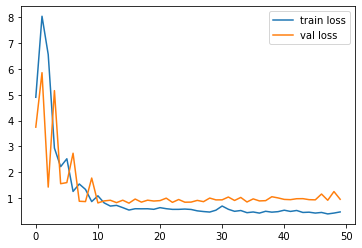

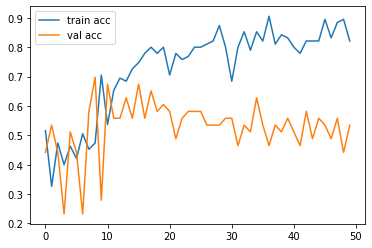

<Figure size 432x288 with 0 Axes>

In [90]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [91]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [92]:

y_pred = model.predict(test_set)


In [31]:
y_pred

array([[0.42460468, 0.20283772, 0.37255764],
       [0.01117143, 0.17250627, 0.8163223 ],
       [0.01298858, 0.79856324, 0.18844825],
       [0.18066576, 0.7758538 , 0.04348042],
       [0.1260008 , 0.8603066 , 0.01369265],
       [0.33657613, 0.4642753 , 0.19914849],
       [0.15468001, 0.59619933, 0.24912065],
       [0.6007638 , 0.32535   , 0.07388619],
       [0.23700565, 0.4828091 , 0.28018525],
       [0.10340677, 0.67568505, 0.22090816],
       [0.5087236 , 0.45696506, 0.03431136],
       [0.07541306, 0.47149685, 0.45309   ],
       [0.16965218, 0.7873223 , 0.04302548],
       [0.12751938, 0.8595332 , 0.01294748],
       [0.7167495 , 0.15937741, 0.12387314],
       [0.5167252 , 0.39779827, 0.08547647],
       [0.16029046, 0.43615785, 0.40355167],
       [0.4202638 , 0.32529867, 0.25443754],
       [0.37127346, 0.06382316, 0.5649034 ],
       [0.17550646, 0.40348914, 0.42100444],
       [0.07682206, 0.62929624, 0.29388165],
       [0.04511731, 0.65721536, 0.29766735],
       [0.

In [93]:
y_pred.shape

(43, 3)

In [96]:
import numpy as np
y_pred1 = np.argmax(y_pred, axis=1)

In [97]:
y_pred1

array([1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 2],
      dtype=int64)

In [98]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [99]:
model=load_model('model_resnet50.h5')

In [100]:
img=image.load_img('Datasets/Test/Horse/5.jpg',target_size=(224,224))


In [101]:
image

<module 'tensorflow.keras.preprocessing.image' from 'C:\\Users\\Suraj Kumar\\Anaconda3\\lib\\site-packages\\tensorflow\\keras\\preprocessing\\image\\__init__.py'>

In [102]:
x=image.img_to_array(img)
x

array([[[230., 239., 244.],
        [230., 239., 244.],
        [231., 240., 245.],
        ...,
        [238., 243., 249.],
        [235., 242., 248.],
        [235., 242., 248.]],

       [[232., 241., 246.],
        [232., 241., 246.],
        [234., 241., 247.],
        ...,
        [238., 243., 249.],
        [235., 242., 248.],
        [235., 242., 248.]],

       [[234., 241., 247.],
        [234., 241., 247.],
        [234., 241., 247.],
        ...,
        [239., 244., 248.],
        [239., 244., 250.],
        [239., 244., 250.]],

       ...,

       [[  1.,   1.,   1.],
        [  7.,   7.,   7.],
        [  1.,   1.,   0.],
        ...,
        [ 10.,  12.,  11.],
        [ 10.,  12.,  11.],
        [ 11.,  13.,  12.]],

       [[  0.,   0.,   0.],
        [ 10.,  10.,   8.],
        [  2.,   2.,   0.],
        ...,
        [ 14.,  16.,  15.],
        [ 12.,  14.,  13.],
        [ 12.,  14.,  13.]],

       [[  5.,   5.,   3.],
        [ 20.,  20.,  18.],
        [ 31.,  

In [103]:
x.shape

(224, 224, 3)

In [104]:
x=x/255

In [105]:
x

array([[[0.9019608 , 0.9372549 , 0.95686275],
        [0.9019608 , 0.9372549 , 0.95686275],
        [0.90588236, 0.9411765 , 0.9607843 ],
        ...,
        [0.93333334, 0.9529412 , 0.9764706 ],
        [0.92156863, 0.9490196 , 0.972549  ],
        [0.92156863, 0.9490196 , 0.972549  ]],

       [[0.9098039 , 0.94509804, 0.9647059 ],
        [0.9098039 , 0.94509804, 0.9647059 ],
        [0.91764706, 0.94509804, 0.96862745],
        ...,
        [0.93333334, 0.9529412 , 0.9764706 ],
        [0.92156863, 0.9490196 , 0.972549  ],
        [0.92156863, 0.9490196 , 0.972549  ]],

       [[0.91764706, 0.94509804, 0.96862745],
        [0.91764706, 0.94509804, 0.96862745],
        [0.91764706, 0.94509804, 0.96862745],
        ...,
        [0.9372549 , 0.95686275, 0.972549  ],
        [0.9372549 , 0.95686275, 0.98039216],
        [0.9372549 , 0.95686275, 0.98039216]],

       ...,

       [[0.00392157, 0.00392157, 0.00392157],
        [0.02745098, 0.02745098, 0.02745098],
        [0.00392157, 0

In [106]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [107]:
a=model.predict(img_data)
a

array([[6.3884811e-14, 1.9808326e-08, 1.0000000e+00]], dtype=float32)

In [108]:
pred=np.argmax(a,axis=1)

In [79]:
#rows=np.argmax(model.predict(img_data), axis=1)

In [109]:
pred

array([2], dtype=int64)